In [21]:
import pandas as pd
import numpy as np

Data loading

In [23]:
df = pd.read_csv('retail_sales_dataset.csv', encoding='latin1')

In [24]:
#Data inspection
print(df.head())
print(df.info())
print(df.describe())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   obj

Data Cleaning

In [25]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Remove rows with missing or invalid dates
df = df.dropna(subset=['Date'])

# Remove duplicates
df = df.drop_duplicates()

# Strip whitespace from object columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

numeric_cols = ['Transaction ID', 'Age', 'Quantity', 'Price per Unit', 'Total Amount']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

df = df.dropna(subset=numeric_cols + ['Gender', 'Product Category', 'Customer ID'])

df = df.reset_index(drop=True)

Descriptive Statistics

In [26]:
# calculating basic statistics
mean_values = df[numeric_cols].mean()
median_values = df[numeric_cols].median()
std_values = df[numeric_cols].std()

print("Mean values:\n", mean_values)
print("\nMedian values:\n", median_values)
print("\nStandard Deviation values:\n", std_values)

Mean values:
 Transaction ID    500.500
Age                41.392
Quantity            2.514
Price per Unit    179.890
Total Amount      456.000
dtype: float64

Median values:
 Transaction ID    500.5
Age                42.0
Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64

Standard Deviation values:
 Transaction ID    288.819436
Age                13.681430
Quantity            1.132734
Price per Unit    189.681356
Total Amount      559.997632
dtype: float64


Time Series Analysis

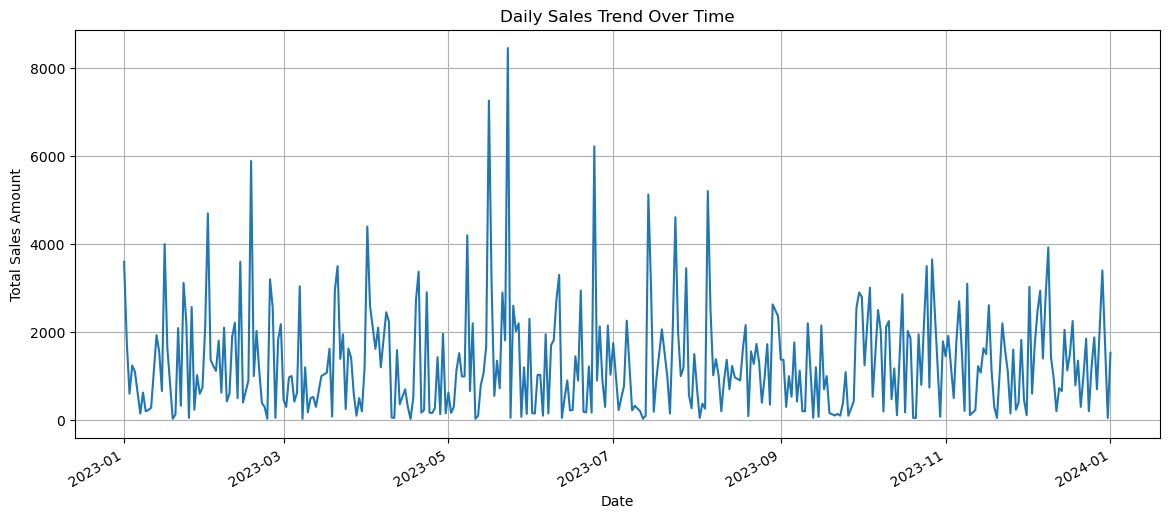

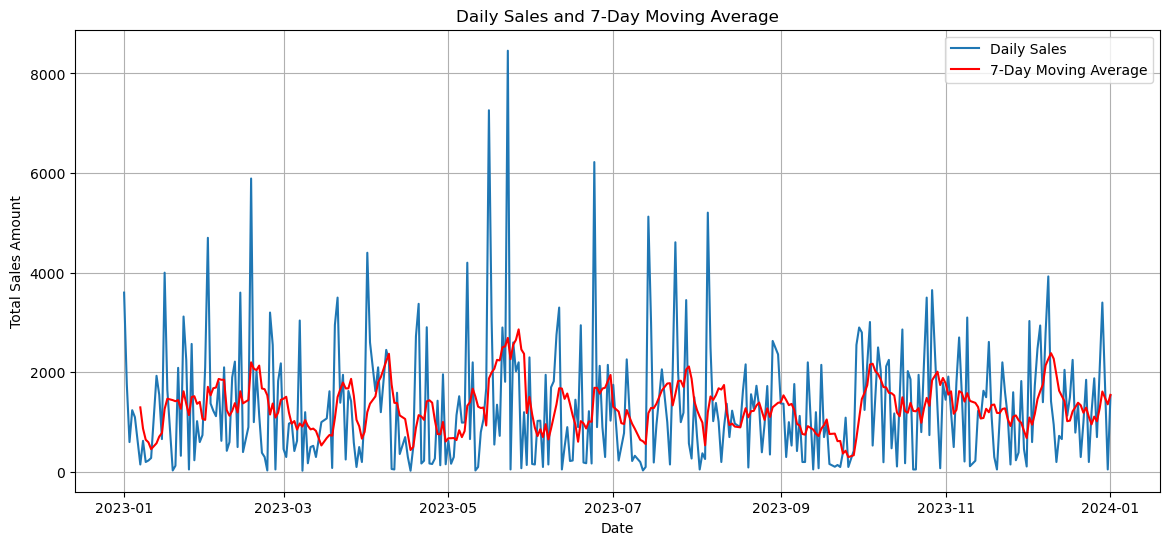

In [27]:
daily_sales = df.groupby('Date')['Total Amount'].sum().sort_index()

# Plot the daily sales trend
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
daily_sales.plot()
plt.title('Daily Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()

# Calculate and plot the 7-day moving average of daily sales
daily_sales_ma7 = daily_sales.rolling(window=7).mean()

plt.figure(figsize=(14, 6))
plt.plot(daily_sales.index, daily_sales, label='Daily Sales')
plt.plot(daily_sales_ma7.index, daily_sales_ma7, label='7-Day Moving Average', color='red')
plt.title('Daily Sales and 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.legend()
plt.grid(True)
plt.show()

Customer and Product Analysis

In [28]:
#Gender
gender_counts = df['Gender'].value_counts()
print("Gender Distribution:\n", gender_counts)

Gender Distribution:
 Gender
Female    510
Male      490
Name: count, dtype: int64


c:\Users\sadashiv sawant\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


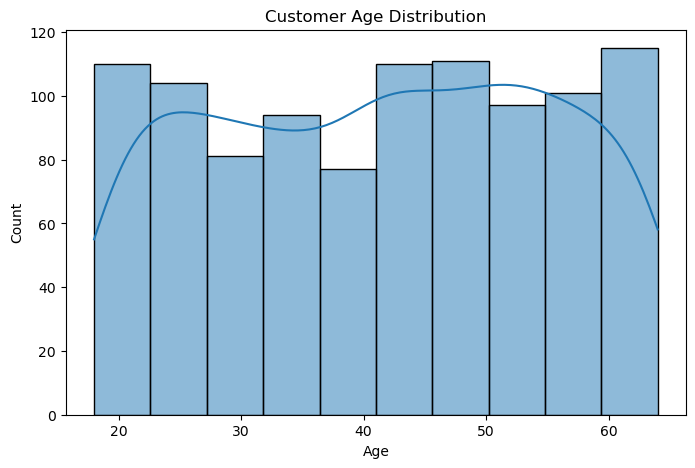

In [29]:
#Age
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Purchasing Behavior

In [30]:
#spending by gender
spending_by_gender = df.groupby('Gender')['Total Amount'].sum()
print("\nTotal Spending by Gender:\n", spending_by_gender)


Total Spending by Gender:
 Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


In [31]:
#spending by age
df['Age Group'] = pd.cut(df['Age'], bins=[17, 25, 35, 45, 55, 65], 
                         labels=['18-25', '26-35', '36-45', '46-55', '56-65'])

spending_by_age_group = df.groupby('Age Group')['Total Amount'].sum()
print("\nTotal Spending by Age Group:\n", spending_by_age_group)



Total Spending by Age Group:
 Age Group
18-25     84550
26-35     98480
36-45     91870
46-55    100690
56-65     80410
Name: Total Amount, dtype: int64


C:\Users\sadashiv sawant\AppData\Local\Temp\ipykernel_14652\2601899786.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spending_by_age_group = df.groupby('Age Group')['Total Amount'].sum()


In [32]:
product_preference = df['Product Category'].value_counts()
print("\nProduct Category Preferences:\n", product_preference)


Product Category Preferences:
 Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


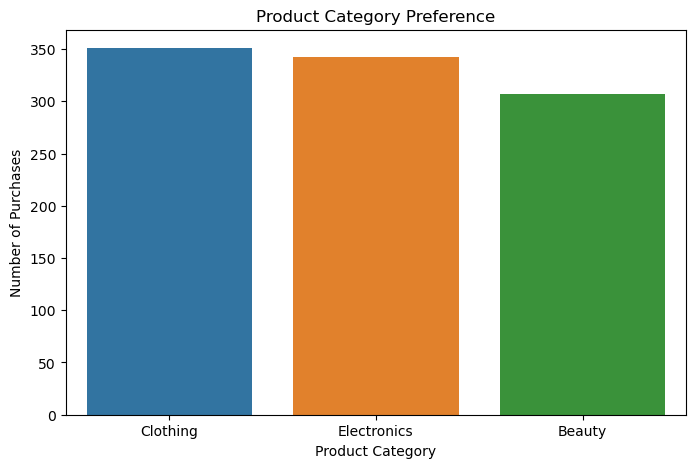

In [33]:
#Spending by product category
plt.figure(figsize=(8, 5))
sns.barplot(x=product_preference.index, y=product_preference.values)
plt.title('Product Category Preference')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.show()

In [34]:
avg_purchase = df.groupby('Product Category')['Total Amount'].mean()
print("\nAverage Purchase Amount by Category:\n", avg_purchase)


Average Purchase Amount by Category:
 Product Category
Beauty         467.475570
Clothing       443.247863
Electronics    458.786550
Name: Total Amount, dtype: float64


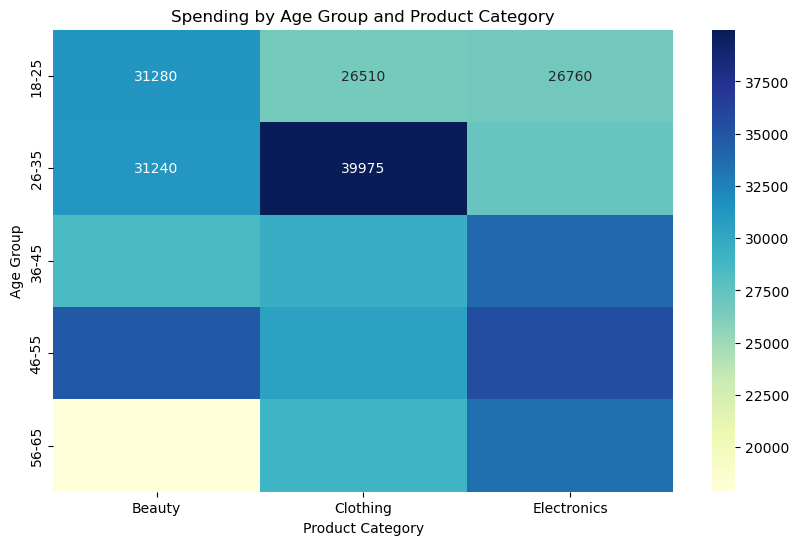

In [35]:
#Heatmap
pivot = pd.pivot_table(df, values='Total Amount', 
                       index='Age Group', 
                       columns='Product Category', 
                       aggfunc='sum', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Spending by Age Group and Product Category')
plt.show()

Visualization:- 
All the above insight visvualization is done with thw help of histogram,heatmap,bargraph and linegraph

Recommendation:-
1. Target High-Spending Demographics
2. Optimize Inventory for Popular Categories
3. Develop Age-Specific Product Campaigns
4. Promote High-Value Items in Low-Volume Segments